## 과제: 피마 인디언 당뇨병 예측

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Data 확인

In [72]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [73]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## glucose, bloodpressure, skinThickness,Insulin,BMI == 0  해결

In [74]:
diabetes_data.loc[diabetes_data['Glucose'].values == 0, 'Glucose']= diabetes_data['Glucose'].mean()
diabetes_data.loc[diabetes_data['BloodPressure'].values == 0,'BloodPressure']= diabetes_data['BloodPressure'].mean()
diabetes_data.loc[diabetes_data['SkinThickness'].values == 0,'SkinThickness']= diabetes_data['SkinThickness'].mean()
diabetes_data.loc[diabetes_data['Insulin'].values == 0,'Insulin']= diabetes_data['Insulin'].mean()
diabetes_data.loc[diabetes_data['BMI'].values == 0,'BMI']= diabetes_data['BMI'].mean()

In [75]:
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [76]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Pregnancies 전처리

In [77]:
diabetes_data.loc[diabetes_data['Pregnancies']<=2,"Pregnancies"] = 0
diabetes_data.loc[(diabetes_data['Pregnancies']>2) & (diabetes_data['Pregnancies']<=5),"Pregnancies"] = 1
diabetes_data.loc[(diabetes_data['Pregnancies']>5) & (diabetes_data['Pregnancies']<=8),"Pregnancies"] = 2
diabetes_data.loc[(diabetes_data['Pregnancies']>8) & (diabetes_data['Pregnancies']<=11),"Pregnancies"] = 3
diabetes_data.loc[(diabetes_data['Pregnancies']>11) & (diabetes_data['Pregnancies']<=14),"Pregnancies"] = 4
diabetes_data.loc[(diabetes_data['Pregnancies']>14) & (diabetes_data['Pregnancies']<=17),"Pregnancies"] = 5

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

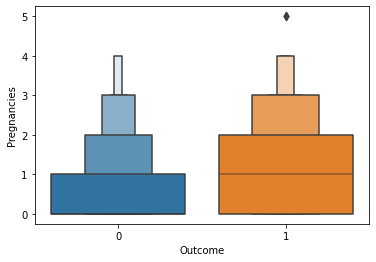

In [78]:
import seaborn as sns
display(sns.boxenplot(x='Outcome', y='Pregnancies', data = diabetes_data))

## Glucose 전처리

In [79]:
diabetes_data.loc[(diabetes_data['Glucose']>=40) & (diabetes_data['Glucose']<60),'Glucose'] = 0
diabetes_data.loc[(diabetes_data['Glucose']>=60) & (diabetes_data['Glucose']<80),'Glucose'] = 1
diabetes_data.loc[(diabetes_data['Glucose']>=80) & (diabetes_data['Glucose']<100),'Glucose'] = 2
diabetes_data.loc[(diabetes_data['Glucose']>=100) & (diabetes_data['Glucose']<120),'Glucose'] = 3
diabetes_data.loc[(diabetes_data['Glucose']>=120) & (diabetes_data['Glucose']<140),'Glucose'] = 4
diabetes_data.loc[(diabetes_data['Glucose']>=140) & (diabetes_data['Glucose']<160),'Glucose'] = 5
diabetes_data.loc[(diabetes_data['Glucose']>=160) & (diabetes_data['Glucose']<180),'Glucose'] = 6
diabetes_data.loc[(diabetes_data['Glucose']>=180) & (diabetes_data['Glucose']<200),'Glucose'] = 7

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

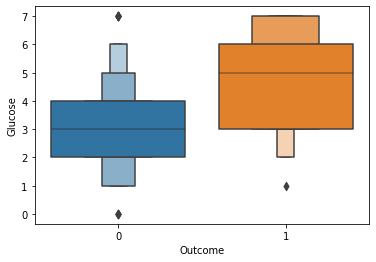

In [80]:
display(sns.boxenplot(x='Outcome', y='Glucose', data = diabetes_data))

## BloodPressure 전처리

In [81]:
diabetes_data.loc[(diabetes_data['BloodPressure']>=20) & (diabetes_data['BloodPressure']<40),'BloodPressure'] = 0
diabetes_data.loc[(diabetes_data['BloodPressure']>=40) & (diabetes_data['BloodPressure']<60),'BloodPressure'] = 1
diabetes_data.loc[(diabetes_data['BloodPressure']>=60) & (diabetes_data['BloodPressure']<80),'BloodPressure'] = 2
diabetes_data.loc[(diabetes_data['BloodPressure']>=80) & (diabetes_data['BloodPressure']<100),'BloodPressure'] = 3
diabetes_data.loc[(diabetes_data['BloodPressure']>=100) & (diabetes_data['BloodPressure']<120),'BloodPressure'] = 4
diabetes_data.loc[(diabetes_data['BloodPressure']>=120) & (diabetes_data['BloodPressure']<140),'BloodPressure'] = 5

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

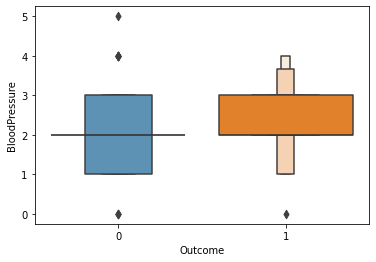

In [82]:
display(sns.boxenplot(x='Outcome', y='BloodPressure', data = diabetes_data))


## SkinThickness 전처리

In [83]:
diabetes_data.loc[(diabetes_data['SkinThickness']>=0) & (diabetes_data['SkinThickness']<20),'SkinThickness'] = 0
diabetes_data.loc[(diabetes_data['SkinThickness']>=20) & (diabetes_data['SkinThickness']<40),'SkinThickness'] = 1
diabetes_data.loc[(diabetes_data['SkinThickness']>=40) & (diabetes_data['SkinThickness']<60),'SkinThickness'] = 2
diabetes_data.loc[(diabetes_data['SkinThickness']>=60) & (diabetes_data['SkinThickness']<80),'SkinThickness'] = 3
diabetes_data.loc[(diabetes_data['SkinThickness']>=80) & (diabetes_data['SkinThickness']<100),'SkinThickness'] = 4

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

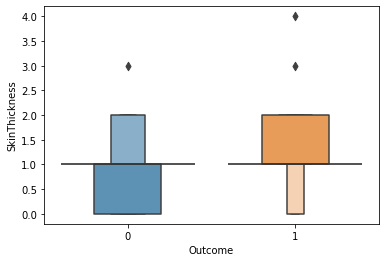

In [84]:
display(sns.boxenplot(x='Outcome', y='SkinThickness', data = diabetes_data))


## Insulin 전처리

In [85]:
diabetes_data.loc[(diabetes_data['Insulin']>=0) & (diabetes_data['Insulin']<200),'Insulin'] = 0
diabetes_data.loc[(diabetes_data['Insulin']>=200) & (diabetes_data['Insulin']<400),'Insulin'] = 1
diabetes_data.loc[(diabetes_data['Insulin']>=400) & (diabetes_data['Insulin']<600),'Insulin'] = 2
diabetes_data.loc[(diabetes_data['Insulin']>=600) & (diabetes_data['Insulin']<800),'Insulin'] = 3
diabetes_data.loc[(diabetes_data['Insulin']>=800) & (diabetes_data['Insulin']<1000),'Insulin'] = 4

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

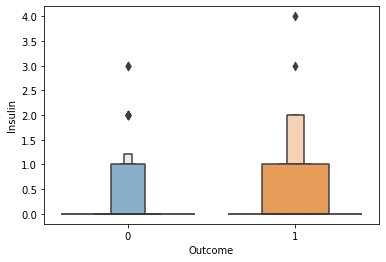

In [86]:
display(sns.boxenplot(x='Outcome', y='Insulin', data = diabetes_data))


## BMI 전처리

In [87]:
diabetes_data.loc[(diabetes_data['BMI']>=0) & (diabetes_data['BMI']<20),'BMI'] = 0
diabetes_data.loc[(diabetes_data['BMI']>=20) & (diabetes_data['BMI']<40),'BMI'] = 1
diabetes_data.loc[(diabetes_data['BMI']>=40) & (diabetes_data['BMI']<60),'BMI'] = 2
diabetes_data.loc[(diabetes_data['BMI']>=60) & (diabetes_data['BMI']<80),'BMI'] = 3

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,5.0,2.0,1.0,0.0,1.0,0.627,50,1
1,0,2.0,2.0,1.0,0.0,1.0,0.351,31,0
2,2,7.0,2.0,1.0,0.0,1.0,0.672,32,1
3,0,2.0,2.0,1.0,0.0,1.0,0.167,21,0
4,0,4.0,1.0,1.0,0.0,2.0,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,3,3.0,2.0,2.0,0.0,1.0,0.171,63,0
764,0,4.0,2.0,1.0,0.0,1.0,0.340,27,0
765,1,4.0,2.0,1.0,0.0,1.0,0.245,30,0
766,0,4.0,2.0,1.0,0.0,1.0,0.349,47,1


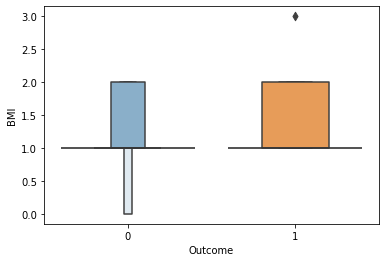

In [88]:
display(sns.boxenplot(x='Outcome', y='BMI', data = diabetes_data))
diabetes_data

## DPF 전처리

In [89]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.975260,3.622396,2.171875,0.977865,0.148438,1.111979,0.471876,33.240885,0.348958
std,1.115571,1.536388,0.659217,0.528982,0.455415,0.368884,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,0.000000,2.750000,2.000000,1.000000,0.000000,1.000000,0.243750,24.000000,0.000000
50%,1.000000,3.000000,2.000000,1.000000,0.000000,1.000000,0.372500,29.000000,0.000000
75%,2.000000,5.000000,3.000000,1.000000,0.000000,1.000000,0.626250,41.000000,1.000000
max,5.000000,7.000000,5.000000,4.000000,4.000000,3.000000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

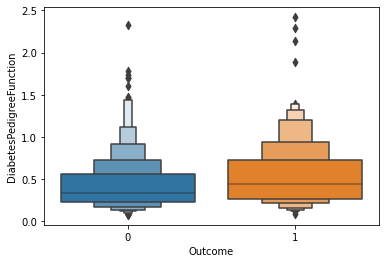

In [42]:
display(sns.boxenplot(x='Outcome', y='DiabetesPedigreeFunction', data = diabetes_data))


In [90]:
diabetes_data.loc[(diabetes_data['DiabetesPedigreeFunction']>=0) & (diabetes_data['DiabetesPedigreeFunction']<0.5),'DiabetesPedigreeFunction'] = 0
diabetes_data.loc[(diabetes_data['DiabetesPedigreeFunction']>=0.5) & (diabetes_data['DiabetesPedigreeFunction']<1.0),'DiabetesPedigreeFunction'] =1
diabetes_data.loc[(diabetes_data['DiabetesPedigreeFunction']>=1.0) & (diabetes_data['DiabetesPedigreeFunction']<1.5),'DiabetesPedigreeFunction'] = 2
diabetes_data.loc[(diabetes_data['DiabetesPedigreeFunction']>=1.5) & (diabetes_data['DiabetesPedigreeFunction']<2.0),'DiabetesPedigreeFunction'] = 3
diabetes_data.loc[(diabetes_data['DiabetesPedigreeFunction']>=2.0) & (diabetes_data['DiabetesPedigreeFunction']<2.5),'DiabetesPedigreeFunction'] = 4


## Age 전처리

In [91]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.975260,3.622396,2.171875,0.977865,0.148438,1.111979,1.434896,33.240885,0.348958
std,1.115571,1.536388,0.659217,0.528982,0.455415,0.368884,1.913632,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000
25%,0.000000,2.750000,2.000000,1.000000,0.000000,1.000000,0.000000,24.000000,0.000000
50%,1.000000,3.000000,2.000000,1.000000,0.000000,1.000000,0.000000,29.000000,0.000000
75%,2.000000,5.000000,3.000000,1.000000,0.000000,1.000000,4.000000,41.000000,1.000000
max,5.000000,7.000000,5.000000,4.000000,4.000000,3.000000,4.000000,81.000000,1.000000


<AxesSubplot:xlabel='Outcome', ylabel='Age'>

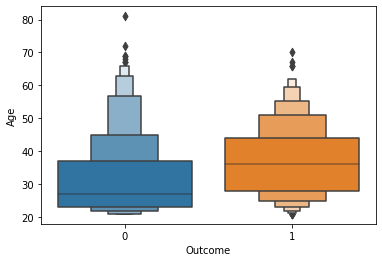

In [43]:
display(sns.boxenplot(x='Outcome', y='Age', data = diabetes_data))


In [92]:
diabetes_data.loc[(diabetes_data['Age']>=20) & (diabetes_data['Age']<40),'Age'] = 0
diabetes_data.loc[(diabetes_data['Age']>=40) & (diabetes_data['Age']<60),'Age'] = 1
diabetes_data.loc[(diabetes_data['Age']>=60) & (diabetes_data['Age']<80),'Age'] = 2
diabetes_data.loc[(diabetes_data['Age']>=80) & (diabetes_data['Age']<100),'Age'] = 3


# 평가지표 계산

In [93]:
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,5.0,2.0,1.0,0.0,1.0,4.0,1,1
1,0,2.0,2.0,1.0,0.0,1.0,0.0,0,0
2,2,7.0,2.0,1.0,0.0,1.0,4.0,0,1
3,0,2.0,2.0,1.0,0.0,1.0,0.0,0,0
4,0,4.0,1.0,1.0,0.0,2.0,4.0,0,1
...,...,...,...,...,...,...,...,...,...
763,3,3.0,2.0,2.0,0.0,1.0,0.0,2,0
764,0,4.0,2.0,1.0,0.0,1.0,0.0,0,0
765,1,4.0,2.0,1.0,0.0,1.0,0.0,0,0
766,0,4.0,2.0,1.0,0.0,1.0,0.0,1,1


In [97]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출. 
# 맨 끝이 Outcome 컬럼으로 레이블 값임. 컬럼 위치 -1을 이용해 추출 
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습,예측 및 평가 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)

## 정확도, 교차행렬, 정밀도, 재현율, F1 Score, ROC , AUC

In [98]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, f1_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix(y_test, pred) #교차행렬
    accuracy = accuracy_score(y_test , pred) #정확도
    precision = precision_score(y_test , pred) #정밀도
    recall = recall_score(y_test , pred) #재현도
    f1 = f1_score(y_test,pred) #F1스코어
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

In [100]:
get_clf_eval(y_test, pred)

오차 행렬
[[88 12]
 [22 32]]
정확도: 0.7792, 정밀도: 0.7273, 재현율: 0.5926, F1:0.6531


In [105]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
# 샘플로 10건만 추출하되, 임곗값을 5 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 5) #np.arange(시작, 끝, 간격)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index 10개: [ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70 75]
샘플용 10개의 임곗값:  [1.91 0.82 0.73 0.62 0.52 0.47 0.43 0.39 0.33 0.3  0.2  0.15 0.13 0.09
 0.06 0.02]
샘플 임곗값별 FPR:  [0.   0.01 0.02 0.06 0.11 0.16 0.19 0.25 0.3  0.35 0.44 0.6  0.65 0.8
 0.87 1.  ]
샘플 임곗값별 TPR:  [0.    0.167 0.37  0.481 0.574 0.611 0.704 0.741 0.796 0.852 0.926 0.926
 0.963 0.981 1.    1.   ]


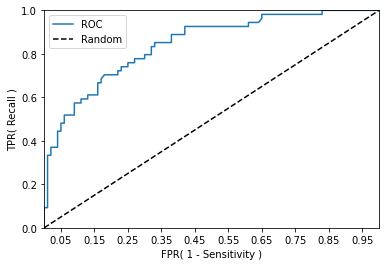

In [107]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

In [108]:
from sklearn.metrics import roc_auc_score

roc_score = roc_auc_score(y_test, pred)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.7363
